In [ ]:
from google.colab import drive
from keras import models
import numpy as np
from PIL import Image         # PIL module is used to extract pixels of image and modify it
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
lesion_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_class_dict = {
    0 : 'nv',
    1 : 'mel',
    2 : 'bkl',
    3 : 'bcc',
    4 : 'akiec',
    5 : 'vasc',
    6 : 'df',   
}



In [ ]:
# inputs = tf.keras.Input(shape=(75,100,3))
# x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
# outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


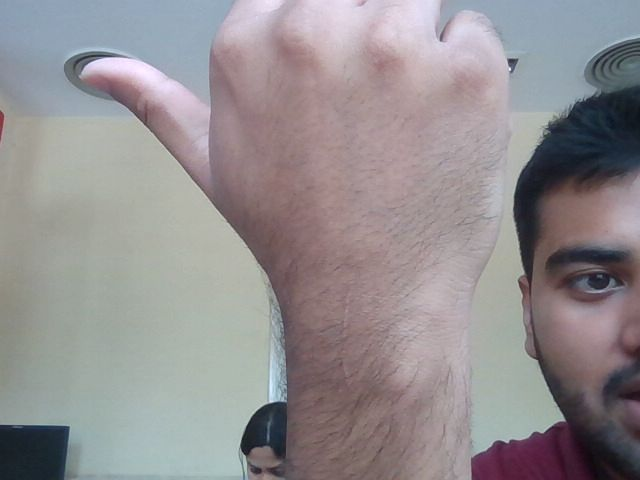

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image_path = '/content/photo.jpg'

In [ ]:
img = image.load_img(image_path, target_size = (75, 100))

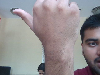

In [ ]:
img

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis = 0)

img_preprocessed = preprocess_input(img_batch)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Model_Minor/model')

In [ ]:
preds = new_model.predict(img_preprocessed)

pred_class = np.argmax(preds, axis = -1)
prt = lesion_class_dict[pred_class[0]]
result = str(prt)

In [ ]:
print(lesion_dict[result])

Actinic keratoses
